# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Deduplication Using K-means Clustering

**Steps**:
1. Data Set: Download a dataset containing duplicate customer records.
2. Preprocess: Standardize the data to ensure better clustering.
3. Apply K-means: Use K-means clustering to find and group similar customer records.
4. Identify Duplicates: Identify and remove duplicates within clusters.

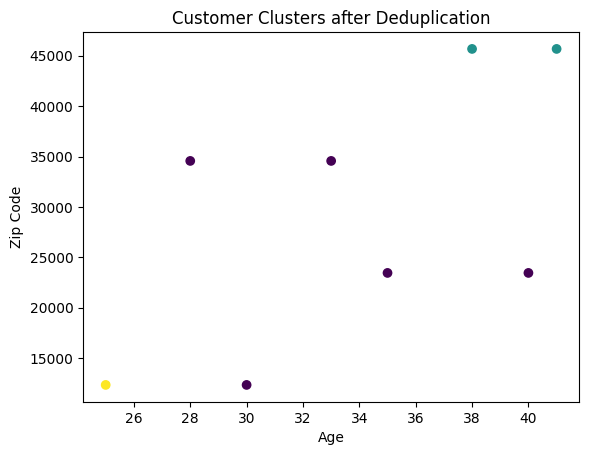

Original dataset size: 8
Cleaned dataset size (after deduplication): 8


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('customers.csv')

# Check if the dataset is empty or contains missing values
if df.isnull().values.any():
    raise ValueError("Data contains missing values. Please handle them before proceeding.")

# Select numerical features for clustering
numerical_features = ['age', 'zip_code', 'purchase_history']
df_numerical = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Function to find duplicates within clusters
def find_duplicates_within_cluster(df, cluster_column='cluster'):
    duplicate_indices = []
    for cluster in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster]
        cluster_data_values = cluster_data[numerical_features].values
        distances = np.linalg.norm(cluster_data_values[:, None] - cluster_data_values, axis=2)
        for i in range(len(distances)):
            for j in range(i + 1, len(distances)):
                if distances[i, j] < 0.1:  # Set a small threshold for similarity
                    duplicate_indices.append(cluster_data.index[i])
                    duplicate_indices.append(cluster_data.index[j])
    return list(set(duplicate_indices))

# Find and remove duplicates
duplicate_indices = find_duplicates_within_cluster(df)
df_cleaned = df.drop(duplicate_indices)

# Visualize the clusters and cleaned data
plt.scatter(df_cleaned['age'], df_cleaned['zip_code'], c=df_cleaned['cluster'], cmap='viridis')
plt.title('Customer Clusters after Deduplication')
plt.xlabel('Age')
plt.ylabel('Zip Code')
plt.show()

# Print the number of records before and after deduplication
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size (after deduplication): {len(df_cleaned)}")
